# Automated Hate Speech Detection in Reddit Platform

To develop a hate speech detection system capable of accurately identifying and classifying hate speech in real-time, ensuring a safer and more welcoming environment for Reddit users.

**Solution Description**

To tackle hate speech on Reddit, a comprehensive detection system was developed using machine learning (ML) and deep learning (DL) techniques:

**Data Preparation**: Collected and preprocessed Reddit comments, addressed class imbalances using SMOTE.


**Model Development**: Implemented and optimized ML models (SVM, SGD Classifier,Random Forest etc.) and DL models (CNN, LSTM).

**Performance**: LSTM model achieved the best accuracy of 0.84.


**Prediction**: Using LSTM Model for real-time detection.

**Dataset Description**:
Total Samples: 22,841


**After Splitting**:

Training Data, Shape: (17,760 samples, 300 features)
Class Distribution: {0: 13506 ,1: 4254}
Testing Data, Shape: (4,440 samples, 300 features)
Class Distribution: {0: 3408 ,1: 1032}

**Data Distribution**

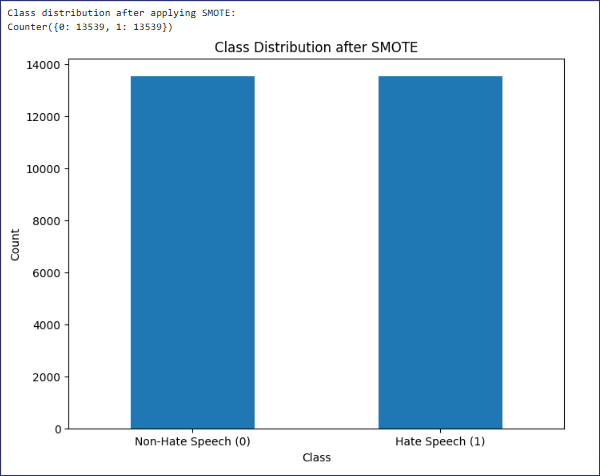

**Final Model : Bert (Bidirectional Encoder Representations from Transformers)**

**Classification Report :**

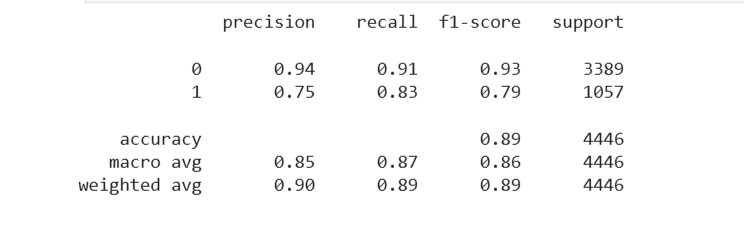

**Confusion Matrix**

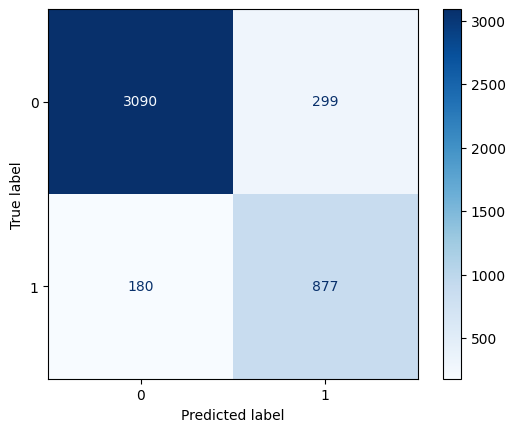

**Sample of Model Prediction**

In [4]:
import re
import json
import string
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Load chat words and number meanings if needed
with open('/content/drive/MyDrive/Colab Notebooks/chat_words (1).json', 'r') as f:
    chat_words = json.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/number_meanings.json', 'r') as f:
    number_meanings = json.load(f)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Lowercase text
    text = text.lower()

    # Clean spaces
    text = ' '.join(text.split())

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Replace chat words
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    text = " ".join(new_text)

    # Convert emojis to text
    text = emoji.demojize(text, delimiters=("", ""))

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

    # Join tokens back into sentence
    text = ' '.join(tokens)

    return text

In [ ]:
# Example input text
input_text = "I hate chocolates, How can people.f.....f' eat chovalgt"

# Apply preprocessing function
preprocessed_text = preprocess_text(input_text)

In [ ]:

import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Assuming 'bert_classifier.pth' is saved in the current directory

# Load the pre-trained BERT model and tokenizer
model_path = 'bert_classifier.pth'
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to preprocess text and apply BERT model
def predict(text, model, tokenizer):
    # Tokenize input text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    # Forward pass through BERT model
    outputs = model(**inputs)

    # Get prediction (assuming binary classification)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)

    # Determine if it contains hate speech
    label = torch.argmax(probabilities, dim=1).item()
    if label == 1:
        return "Contains hate speech"
    else:
        return "Does not contain hate speech"

# Example preprocessed text
preprocessed_text = "i hate chocolate how can peopleff...ff' eat chovalgt"

# Apply preprocessing and get classification
classification = predict(preprocessed_text, model, tokenizer)

print("Classification:", classification)

In [ ]:
test_text = "You ever fuck a bitch and she start to cry?"
sentiment = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

You ever fuck a bitch and she start to cry?
Predicted sentiment: contains hate speech


In [ ]:
test_text = " I hate Disneyland. It's fucking waste of money"
sentiment = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

 I hate Disneyland. It's fucking waste of money
Predicted sentiment: does not contain hate speech


In [ ]:
test_text = " we dont trust these niggas all these bitches "
sentiment = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

 we dont trust these niggas all these bitches 
Predicted sentiment: contains hate speech


In [ ]:
test_text= "The new restaurant in town has amazing food and great service."
sentiment = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

The new restaurant in town has amazing food and great service.
Predicted sentiment: does not contain hate speech


In [ ]:
test_text= "Don't trust any of these bitches"
sentiment = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

Don't trust any of these bitches
Predicted sentiment: contains hate speech


In [ ]:
test_text= "The food here tastes like shit"
sentiment = predict(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

The food here tastes like shit
Predicted sentiment: does not contain hate speech
